# CAP 4910 Heart Disease - PCA

In [1]:
#Source of Dataset: https://www.kaggle.com/ronitf/heart-disease-uci

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [97]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.options.display.max_columns = 999

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
df= pd.read_csv('heart.csv')
df_0=pd.read_csv('heart.csv')

df_0['sex'] = df.sex.replace([1,0], ['male', 'female'])
df_0['cp'] = df.cp.replace([0,1,2,3], ['typical_ang', 'atypical_ang', 'non_anginal_pain', 'asymptomatic'])
df_0['fbs'] = df.fbs.replace([1,0], ['true', 'false'])
df_0['restecg'] = df.restecg.replace([0,1,2], ['normal', 'st_abnormality', 'prob_lvh'])
df_0['exang'] = df.exang.replace([0,1], ['no', 'yes'])
df_0['slope'] = df.slope.replace([0,1,2], ['up_sloping','flat', 'downsloping'])
df_0['thal'] = df.thal.replace([3,6,7], ['normal', 'fixed_def', 'rev_def'])
df_0['target'] = df.target.replace([1,0], ['yes', 'no'])

In [99]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Heart Disease dataset

### age -
#### age in years
### sex -
#### (1 = male; 0 = female)
### cp-
#### chest pain type
### trestbps-
#### resting blood pressure (in mm Hg on admission to the hospital)
### chol-
#### serum cholestoral in mg/dl
### fbs-
#### (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### restecg-
#### resting electrocardiographic results
### thalach -
#### maximum heart rate achieved
### exang -
#### exercise induced angina (1 = yes; 0 = no)
### oldpeak-
#### ST depression induced by exercise relative to rest
### slope -
#### the slope of the peak exercise ST segment
### ca -
#### number of major vessels (0-3) colored by flourosopy
### thal -
#### 3 = normal; 6 = fixed defect; 7 = reversable defect

### Our target is to determine if the patient has heart disease or not

In [100]:
df['target'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Describing the dataset

In [101]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Make sure there are no nulls in data

In [102]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Find some correlations

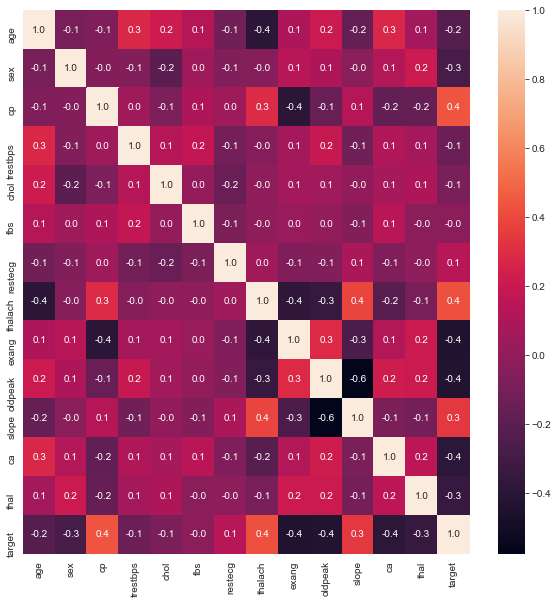

In [104]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [105]:
#Significant Correlations: 

##- thalach and slope
## - chest pain and thalach
## cholesterol and age
##cholesterol and oldspeak

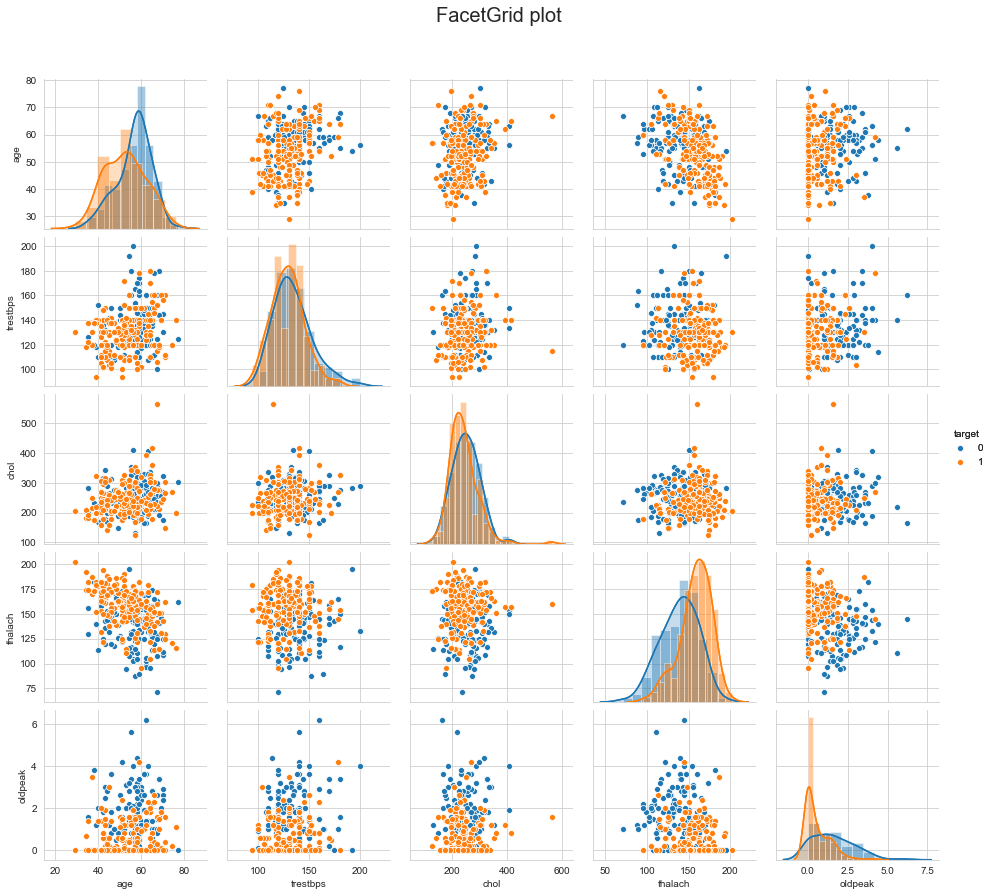

In [106]:
g = sns.pairplot(df, vars =['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue = 'target')
g.map_diag(sns.distplot)
g.add_legend()
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## Correlation between Slope and Thalatch

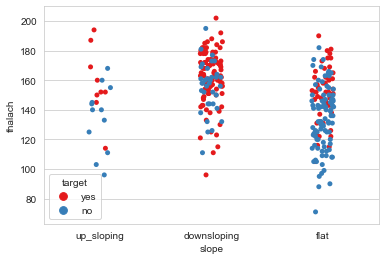

In [107]:
sns.stripplot(x="slope",y="thalach",data=df_0,jitter=True,hue='target',palette='Set1')

## Correlation between Chest Pain and Thalatch

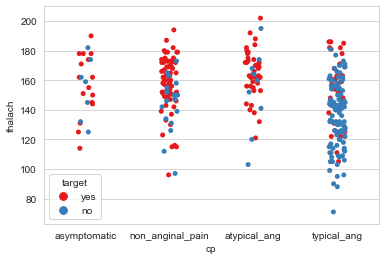

In [108]:
sns.stripplot(x="cp",y="thalach",data=df_0,jitter=True,hue='target',palette='Set1')

# EDA

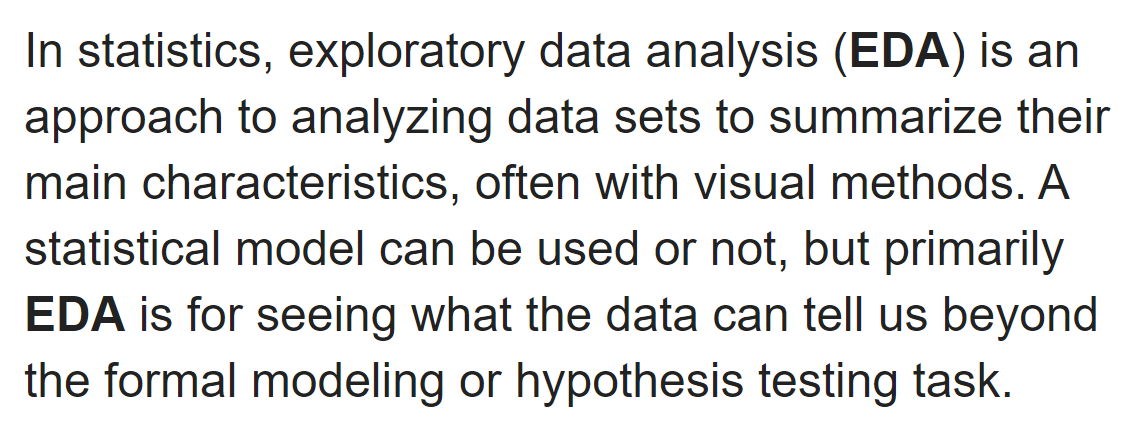

### Using sns to count plot df target.

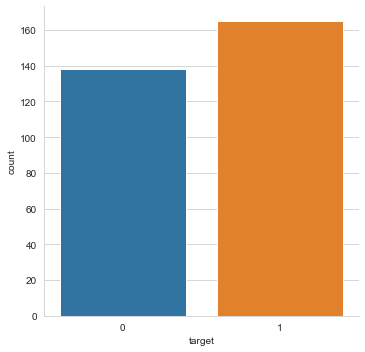

In [109]:
sns.catplot(x='target', kind='count', data=df);

Text(0.5, 1.0, 'Cholestorol vs. Maxiumum Heart Rate Achieved by Target')

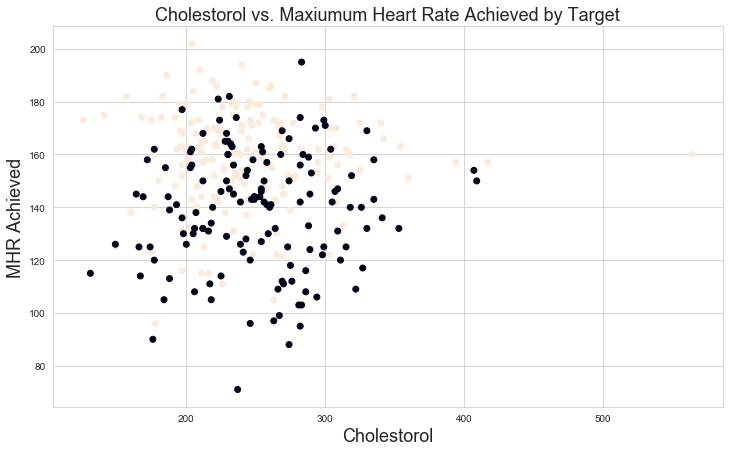

In [110]:
plt.figure(figsize=(12,7))
plt.scatter(df['chol'], df['thalach'], c=df['target'])
plt.xlabel('Cholestorol', fontsize=18)
plt.ylabel('MHR Achieved', fontsize=18)
plt.title('Cholestorol vs. Maxiumum Heart Rate Achieved by Target',fontsize=18)

Text(21.819824218750007, 0.5, 'Age')

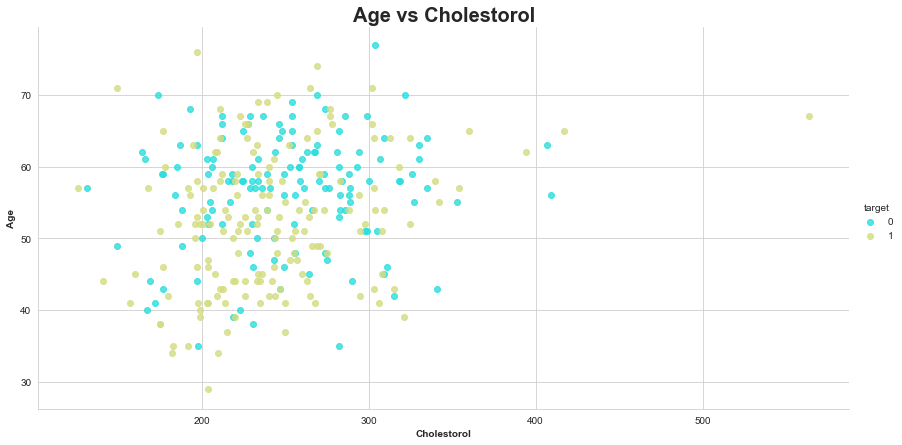

In [111]:
sns.lmplot(x='chol', y='age',data=df, hue='target',fit_reg=False, height=6, aspect=2, palette='rainbow')

ax = plt.gca()
ax.set_title("Age vs Cholestorol", fontdict={'fontsize':20, 'fontweight':'bold'})
ax.set_xlabel("Cholestorol", fontdict={'fontsize':10, 'fontweight':'bold'})
ax.set_ylabel("Age", fontdict={'fontsize':10, 'fontweight':'bold'}) 

Text(0.5, 1.0, 'KDE plot for Age vs Cholestorol depend on Type')

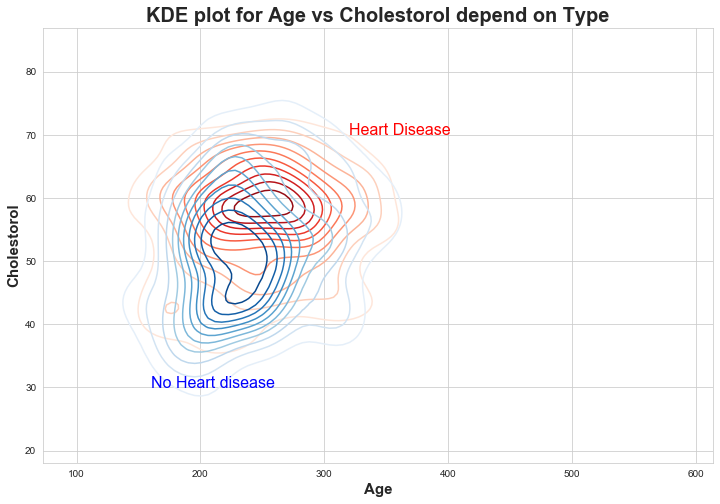

In [112]:
# Set up dataframe for each case
Negative=df[df['target']==0]
Positive=df[df['target']==1]

# Set UP figure
f, ax = plt.subplots(figsize=(12, 8))

ax = sns.kdeplot(Negative['chol'], Negative['age'],
                 cmap="Reds", shade_lowest=False)
ax = sns.kdeplot(Positive['chol'], Positive['age'],
                 cmap="Blues", shade_lowest=False)

# Label
ax.text(160, 30, "No Heart disease", size=16, color='blue')
ax.text(320, 70, "Heart Disease", size=16, color='red')
ax.set_ylabel("Cholesterol", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_xlabel("Age", fontdict={'fontsize':15, 'fontweight':'bold'})
ax.set_title("KDE plot for Age vs Cholestorol depend on Type", fontdict={'fontsize':20, 'fontweight':'bold'})

# Model

### Define X as dataset with target coumn and y as target column.

In [113]:
x = df.drop(['target'], axis=1)
y = df['target']

###  Split X_train, X_test, y_train, y_test with test_size=0.5, random_state=42

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

### Standardize X_train

In [115]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Use lr to train the training dataset.

In [75]:
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Test Accuracy: 0.816


### Use lr to predict and print confusion_matrix.

(2.0, 0)

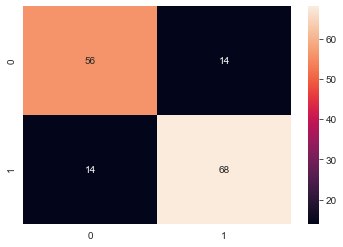

In [76]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [77]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[56 14]
 [14 68]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.83      0.83      0.83        82

    accuracy                           0.82       152
   macro avg       0.81      0.81      0.81       152
weighted avg       0.82      0.82      0.82       152



### Use random_state=101 to print print confusion_matrix.

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=101)

In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
lr= LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Test Accuracy: 0.816


(2.0, 0)

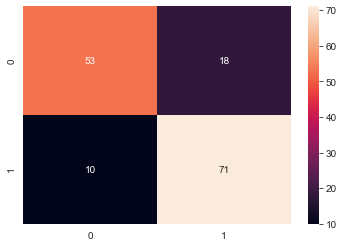

In [81]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [82]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[53 18]
 [10 71]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        71
           1       0.80      0.88      0.84        81

    accuracy                           0.82       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.82      0.82      0.81       152



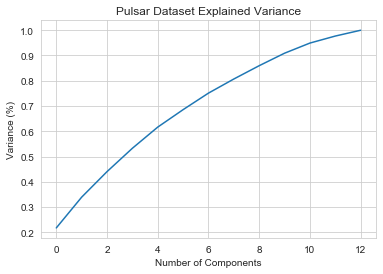

In [83]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

## Two random state show different results on different cases, especially on FN (bottom left number in confusion matrix), which can mean overfit.  Therefore, I will use PCA to reduce the dimensionality of a data set consisting of many variables correlated with each other.

### Define pca with n_components=60 percent variance

In [140]:
pca=PCA(n_components=2) 

### Train pca

In [141]:
pca.fit(X_train) 
X_pca=pca.transform(X_train) #transform the X_train data

X_pca_test=pca.transform(X_test) #transform X_test data (do not fit X_test data)

In [142]:
print("shape of X_pca", X_pca.shape)

shape of X_pca (151, 2)


In [143]:
# Train Regression Model with PCA
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
# Predict Results from PCA Model
y_pred = classifier.predict(X_pca_test)

### Plot pca , cmap='plasma'

Text(0.5, 0, 'Second Principal Component')

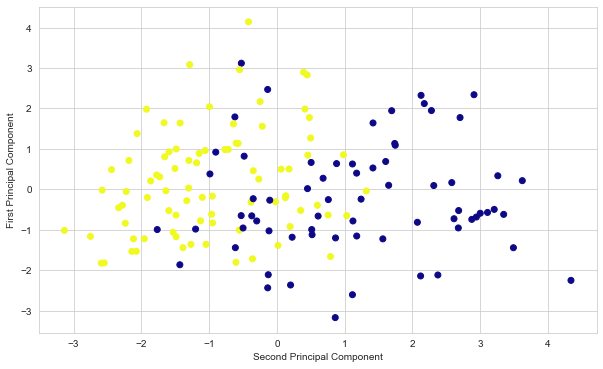

In [145]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='plasma')
plt.ylabel('First Principal Component')
plt.xlabel('Second Principal Component')

In [146]:
pca.components_

array([[ 0.34793962,  0.09900397, -0.28633373,  0.1761038 ,  0.05864449,
         0.03462716, -0.04575435, -0.39559079,  0.38674673,  0.43485588,
        -0.3508117 ,  0.25211076,  0.26002227],
       [ 0.42098633, -0.28839025,  0.20497161,  0.4001068 ,  0.38873655,
         0.37605125, -0.32085229,  0.0219212 , -0.18763823, -0.09706397,
         0.14753888,  0.18697624, -0.20046952]])

In [147]:
df_comp=pd.DataFrame(pca.components_, columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']) 

In [148]:
df_comp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.347940,0.099004,-0.286334,0.176104,0.058644,0.034627,-0.045754,-0.395591,0.386747,0.434856,-0.350812,0.252111,0.260022
1,0.420986,-0.288390,0.204972,0.400107,0.388737,0.376051,-0.320852,0.021921,-0.187638,-0.097064,0.147539,0.186976,-0.200470


### Print pca confusion_matrix

(2.0, 0)

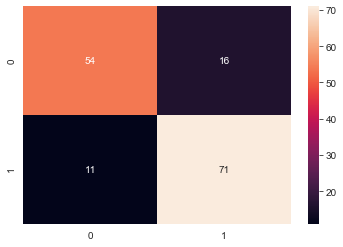

In [149]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True)
ax.set_ylim(2.0, 0)

In [150]:
pca.explained_variance_ratio_ #the first two components explains 33% of data

array([0.20364069, 0.13770889])

In [151]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[54 16]
 [11 71]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        70
           1       0.82      0.87      0.84        82

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152

